In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\chenz\Desktop\体育用品企业销售数据集\订单表.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   订单日期_time  60398 non-null  object 
 1   年份         60398 non-null  int64  
 2   订单数量       60398 non-null  int64  
 3   产品ID       60398 non-null  int64  
 4   客户ID       60398 non-null  object 
 5   交易类型       60398 non-null  int64  
 6   销售区域ID     60398 non-null  int64  
 7   销售大区       60398 non-null  object 
 8   区域         60398 non-null  object 
 9   产品类别       60398 non-null  object 
 10  产品型号名称     60398 non-null  object 
 11  产品名称       60398 non-null  object 
 12  产品成本       60398 non-null  float64
 13  利润         60398 non-null  float64
 14  单价         60398 non-null  float64
 15  销售金额       60398 non-null  float64
dtypes: float64(4), int64(5), object(7)
memory usage: 7.4+ MB


,订单日期_time,年份,订单数量,产品ID,客户ID,交易类型,销售区域ID,销售大区,区域,产品类别,产品型号名称,产品名称,产品成本,利润,单价,销售金额
0,2016/1/1,2016,1,528,14432BA,1,4,西南区,中国,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
1,2016/1/2,2016,1,528,18741BA,1,4,西南区,中国,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
2,2016/1/2,2016,1,528,27988BA,1,4,西南区,中国,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
3,2016/1/5,2016,1,528,25710BA,1,4,西南区,中国,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0
4,2016/1/6,2016,1,528,14999BA,1,4,西南区,中国,配件,Rawlings Heart of THE Hide-11.5,棒球手套,500.0,1199.0,1699.0,1699.0


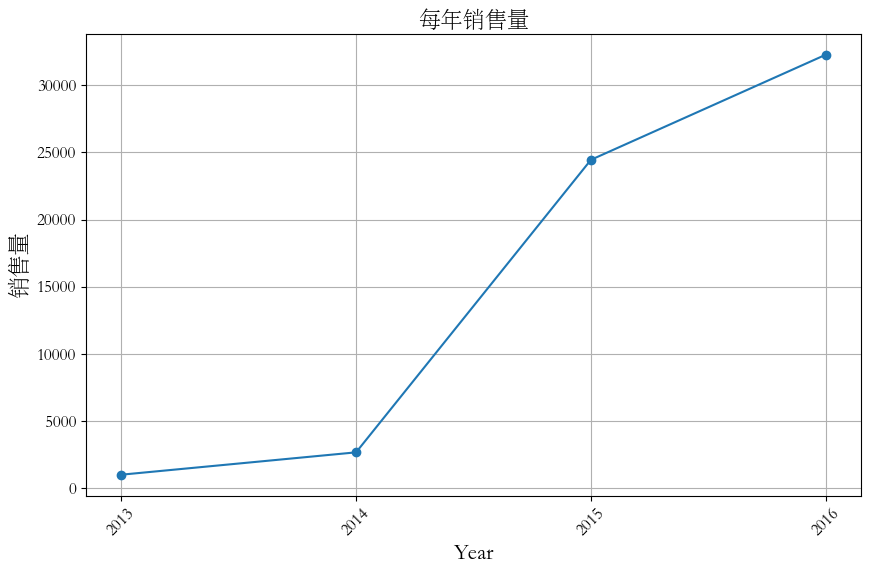

In [4]:
import matplotlib.pyplot as plt
# 设置 matplotlib 使用该字体
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False

yearly_count = data.groupby('年份')['订单数量'].sum()
yearly_count.index = yearly_count.index.astype(str)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(yearly_count.index, yearly_count.values, marker='o')
plt.title('每年销售量',fontsize=16)
plt.xlabel('Year', fontsize=16)  # 增加x轴标签字体大小
plt.ylabel('销售量', fontsize=16)  # 增加y轴标签字体大小
plt.grid(True)
plt.xticks(rotation=45, fontsize=12)  # 旋转x轴标签并增加字体大小
plt.yticks(fontsize=12)  # 增加y轴刻度字体大小
plt.show()

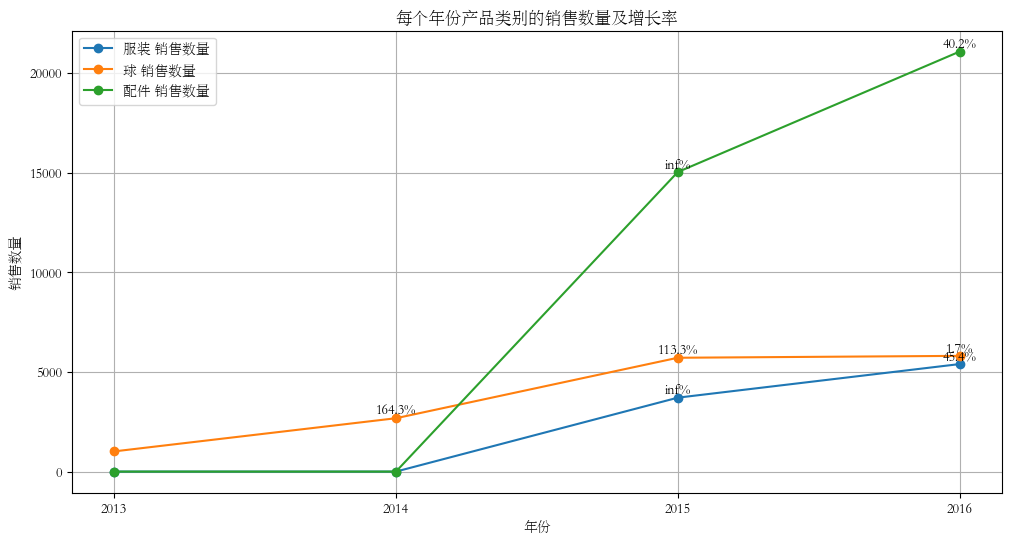

In [5]:
# 按年份和产品类别分组，统计销售数量
sales_by_year_category = data.groupby(["年份", "产品类别"])["订单数量"].sum().unstack().fillna(0)
sales_by_year_category.index = sales_by_year_category.index.astype(str)

# 计算增长率
growth_rates = sales_by_year_category.pct_change() * 100

# 绘制折线图
plt.figure(figsize=(12, 6))

# 遍历每个产品类别
for category in sales_by_year_category.columns:
    plt.plot(sales_by_year_category.index, sales_by_year_category[category], marker='o', label=f'{category} 销售数量')

# 标注增长率
for year in growth_rates.index:
    for category in growth_rates.columns:
        rate = growth_rates.loc[year, category]
        if not pd.isna(rate):
            plt.text(year, sales_by_year_category.loc[year, category], f'{rate:.1f}%', ha='center', va='bottom')

# 添加标题和标签
plt.title('每个年份产品类别的销售数量及增长率')
plt.xlabel('年份')
plt.ylabel('销售数量')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()

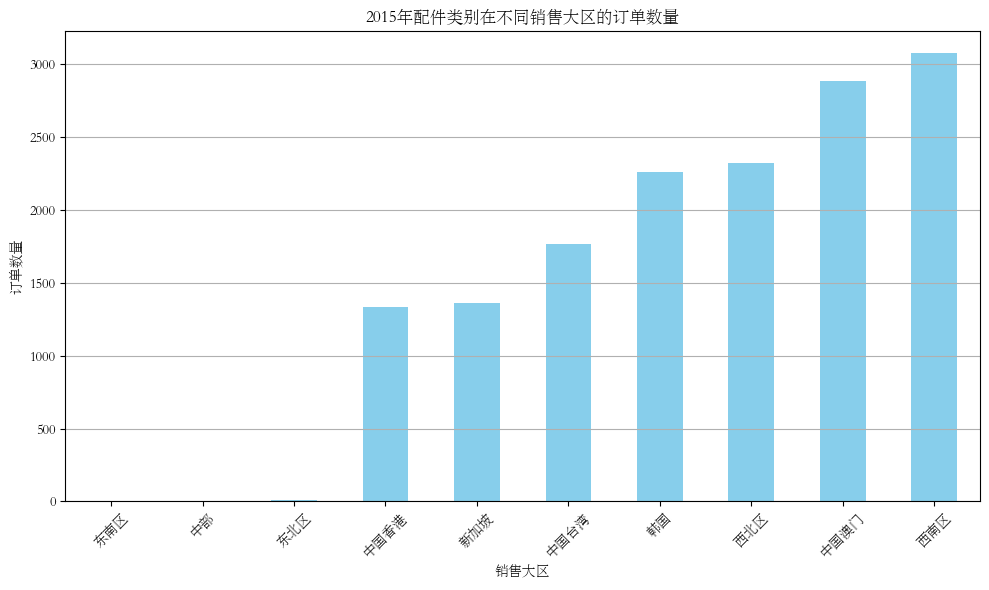

In [4]:
# 筛选2015年和产品类别为“配件”的订单
data_2015_accessories = data[(data['年份'] == 2015) & (data['产品类别'] == '配件')]

# 按销售大区分组，计算每个销售大区的订单数量
order_counts_by_2015 = data_2015_accessories.groupby('销售大区')['订单数量'].count().sort_values()

# 绘制条形图
plt.figure(figsize=(10, 6))
order_counts_by_2015.plot(kind='bar', color='skyblue')
plt.title('2015年配件类别在不同销售大区的订单数量')
plt.xlabel('销售大区')
plt.ylabel('订单数量')
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示
plt.grid(axis='y')  # 添加y轴网格线
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()

      年份  销售大区  订单数量
0   2015   东北区     9
1   2015   东南区     5
2   2015  中国台湾  1764
3   2015  中国澳门  2885
4   2015  中国香港  1334
5   2015    中部     6
6   2015   新加坡  1359
7   2015   西北区  2325
8   2015   西南区  3076
9   2015    韩国  2262
10  2016   东北区    11
11  2016   东南区    20
12  2016  中国台湾  2293
13  2016  中国澳门  4119
14  2016  中国香港  1939
15  2016    中部     8
16  2016   新加坡  1985
17  2016   西北区  3316
18  2016   西南区  4273
19  2016    韩国  3103


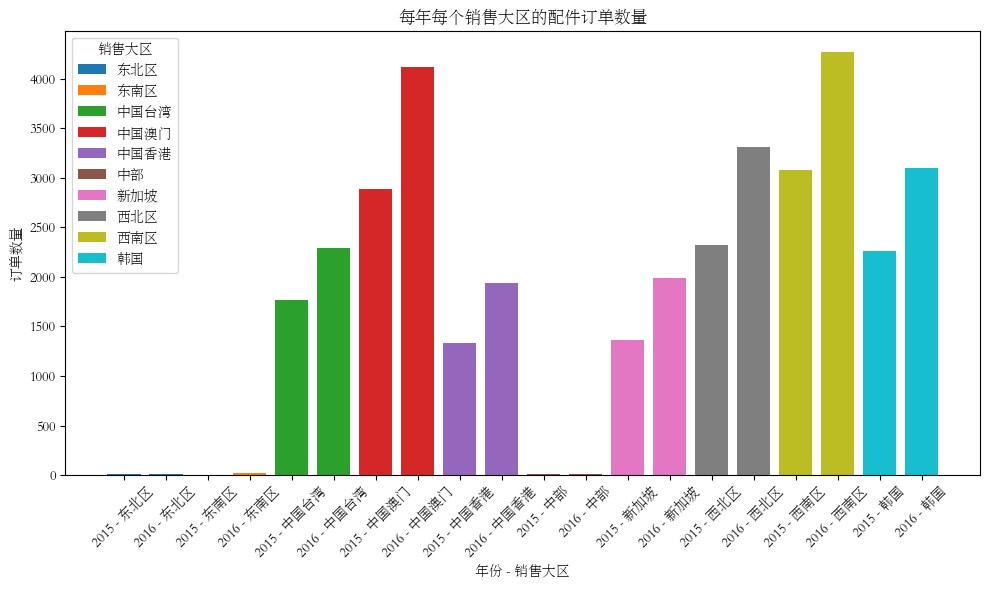

In [20]:
# 确保订单日期是日期类型
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])
accessories_df = data[data['产品类别'] == '配件']

# 按年份和销售大区进行分组，并统计每个组的订单数量
grouped = accessories_df.groupby([accessories_df['年份'], accessories_df['销售大区']]).size().reset_index(name='订单数量')

# 打印统计结果
print(grouped)

plt.figure(figsize=(10, 6))

# 为了确保所有的标签都是字符串类型，我们创建一个新的列来存储组合的标签
grouped['标签'] = grouped['年份'].astype(str) + ' - ' + grouped['销售大区']

# 绘制柱状图
for region in grouped['销售大区'].unique():
    region_data = grouped[grouped['销售大区'] == region]
    plt.bar(region_data['标签'], region_data['订单数量'], label=region)

plt.title('每年每个销售大区的配件订单数量')
plt.xlabel('年份 - 销售大区')
plt.ylabel('订单数量')
plt.legend(title='销售大区')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

       年份 销售大区    产品名称  订单数量        占比
0    2015  东北区      头盔     3  0.333333
1    2015  东北区    棒球手套     6  0.666667
2    2015  东南区    棒球手套     2  0.400000
3    2015  东南区  球棒与球棒袋     2  0.400000
4    2015  东南区      球网     1  0.200000
..    ...  ...     ...   ...       ...
127  2016   韩国    打击T座    22  0.007090
128  2016   韩国    棒球手套  1584  0.510474
129  2016   韩国  球棒与球棒袋   634  0.204318
130  2016   韩国      球网    33  0.010635
131  2016   韩国     装备包    60  0.019336

[132 rows x 5 columns]


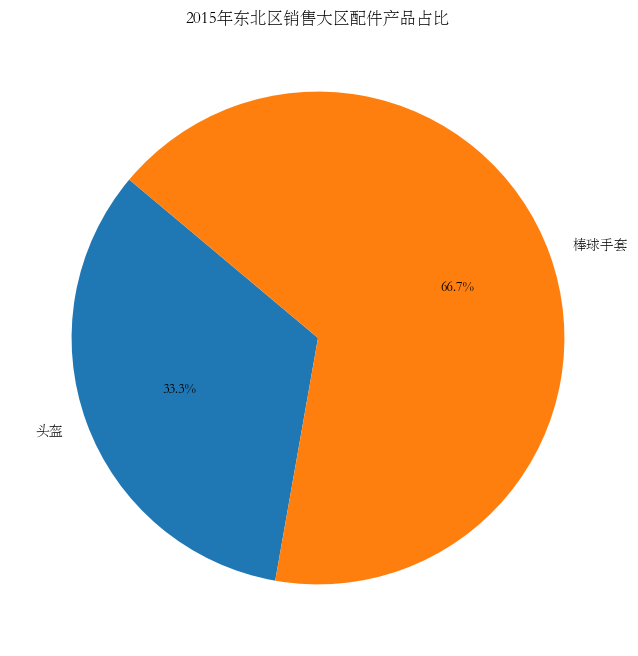

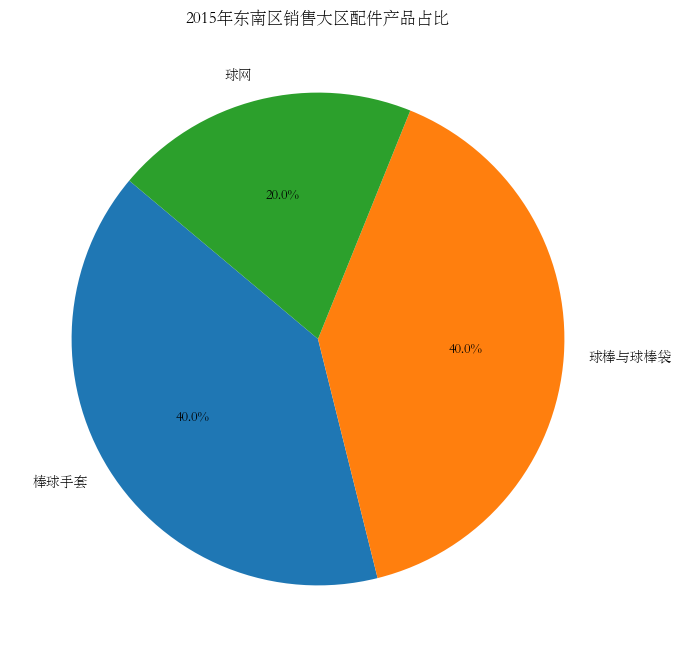

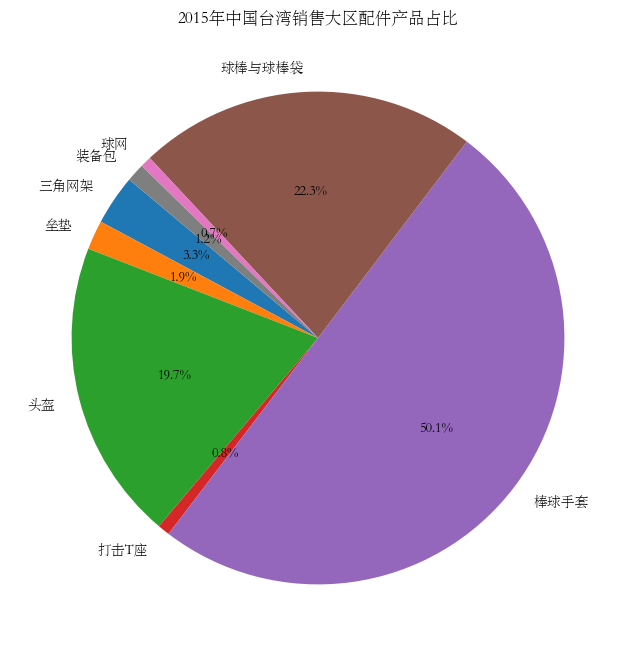

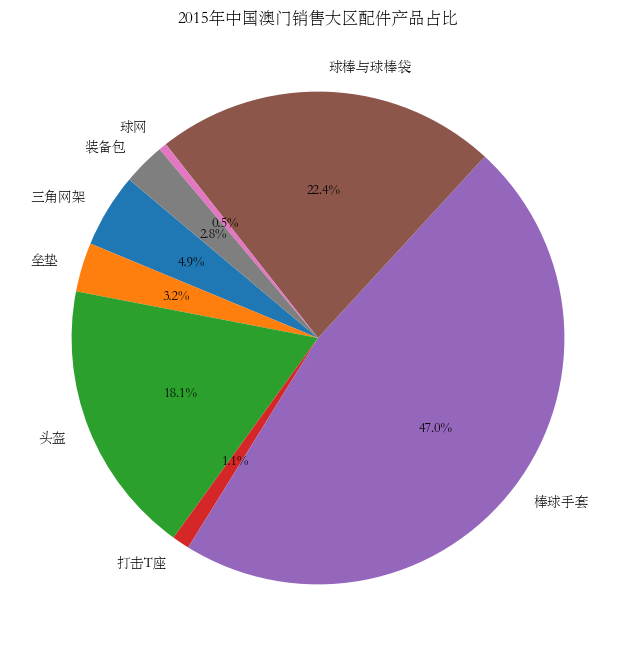

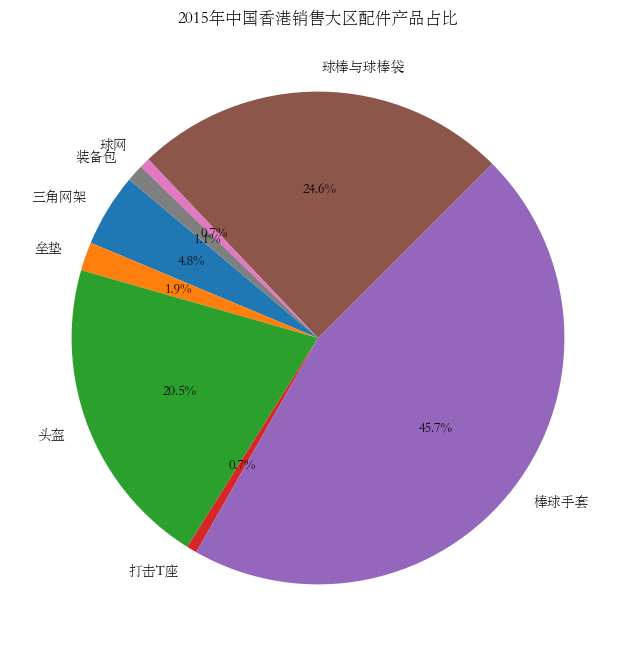

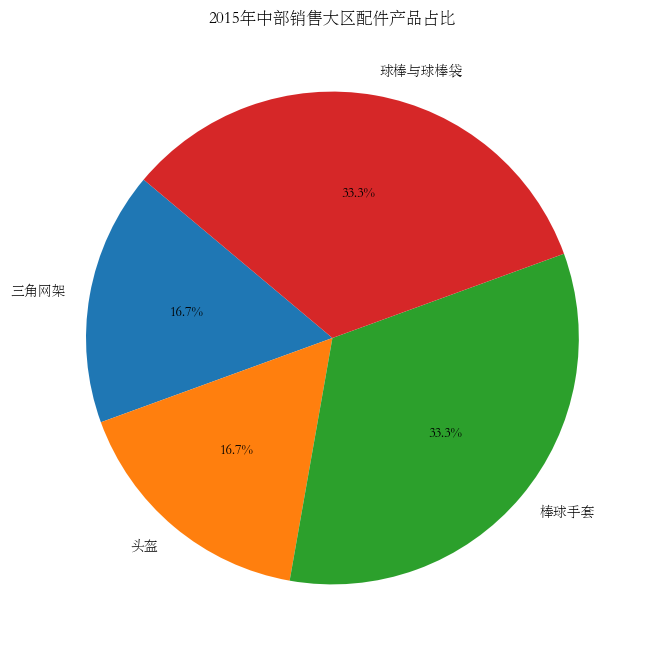

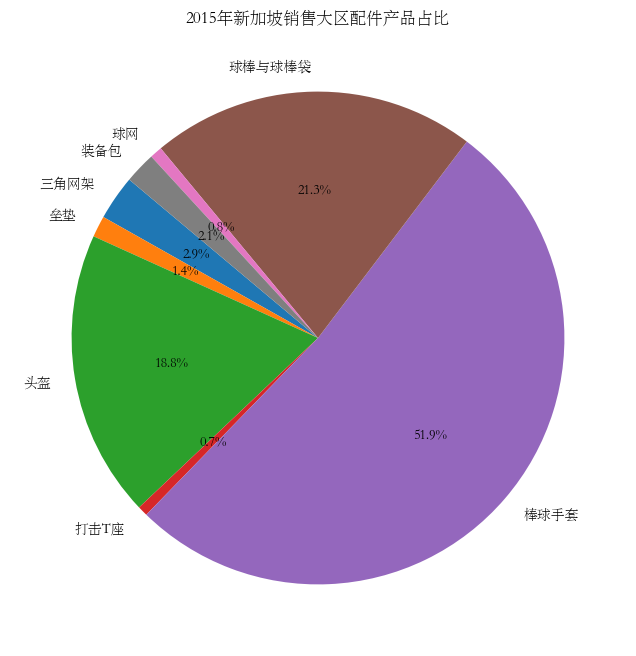

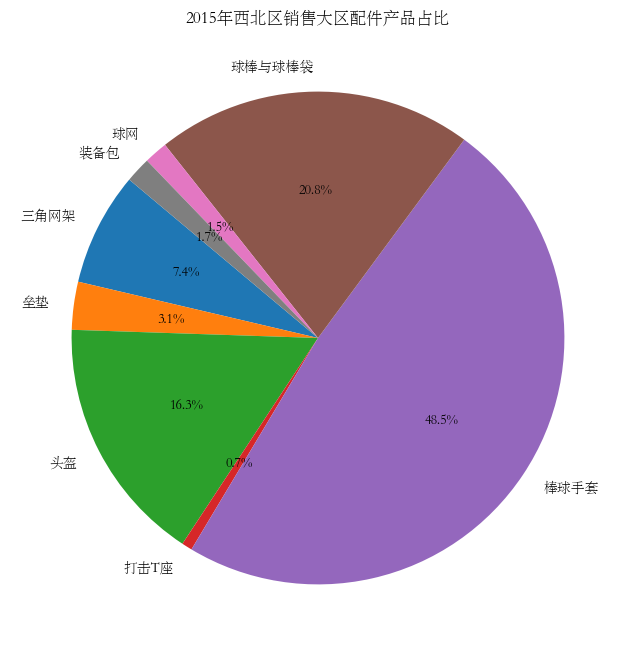

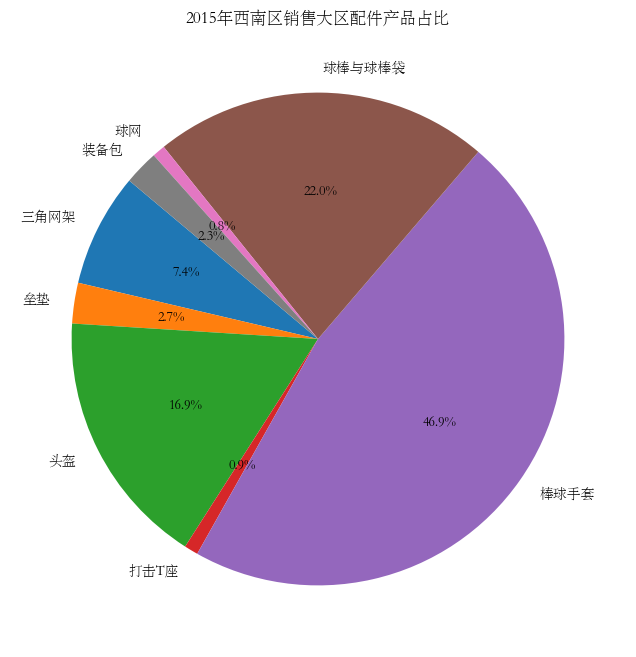

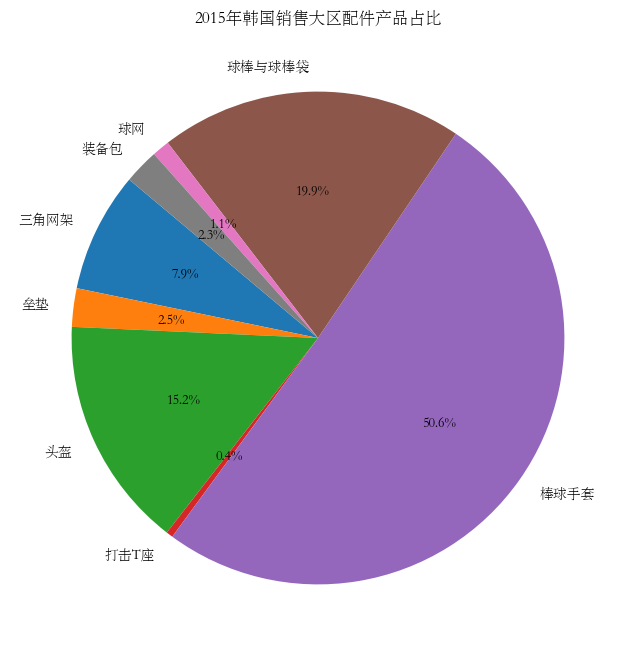

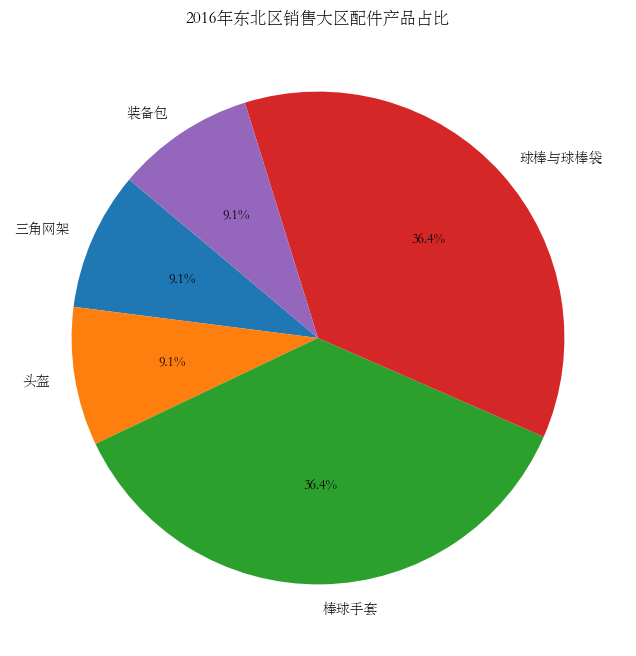

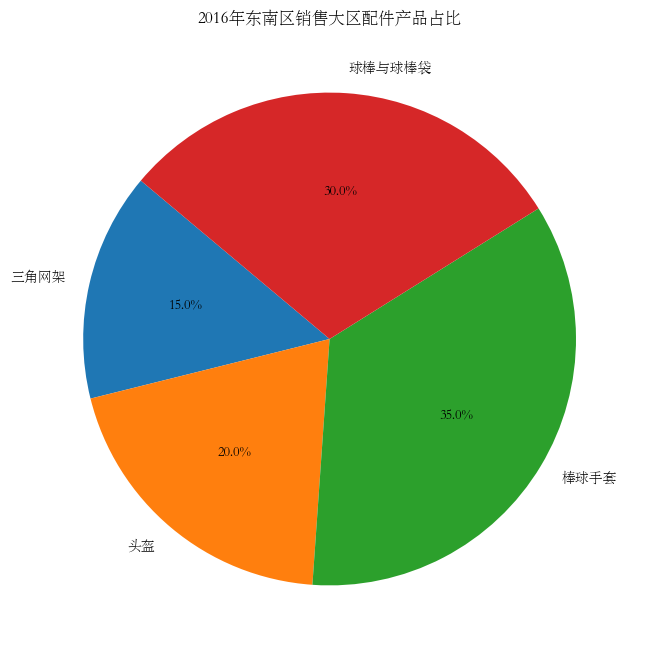

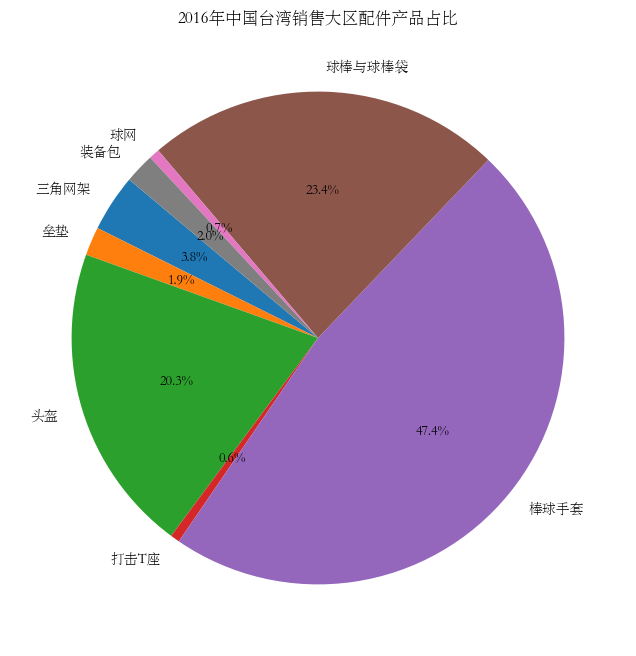

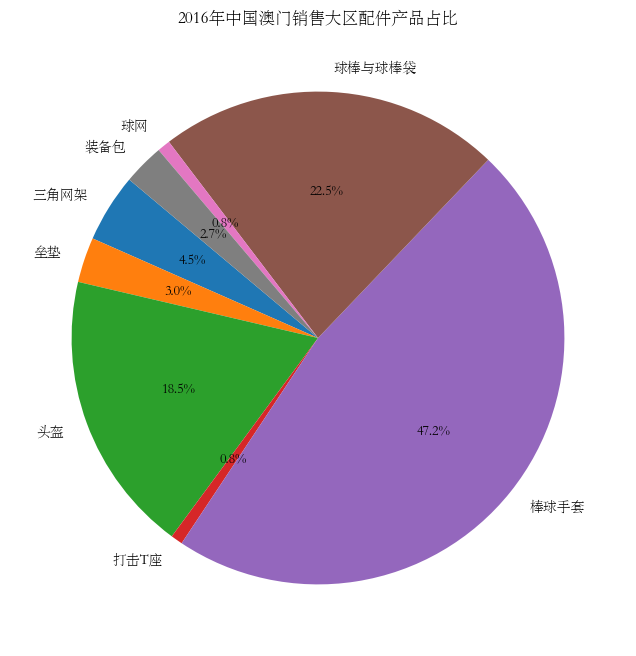

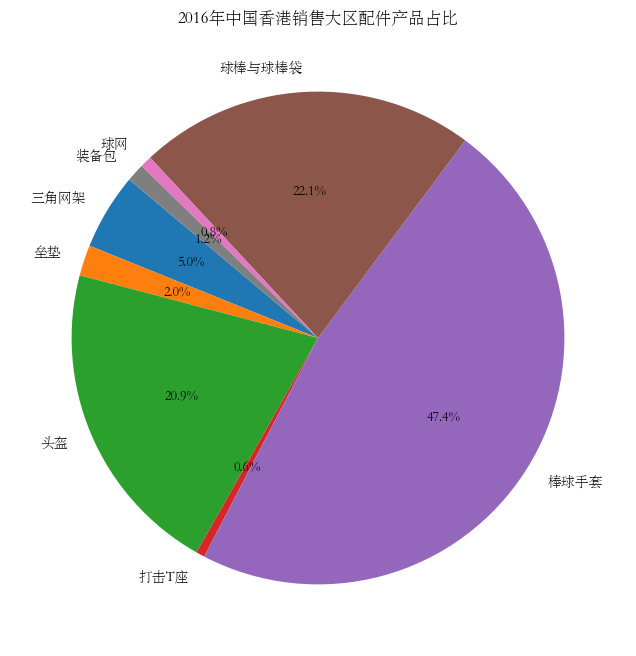

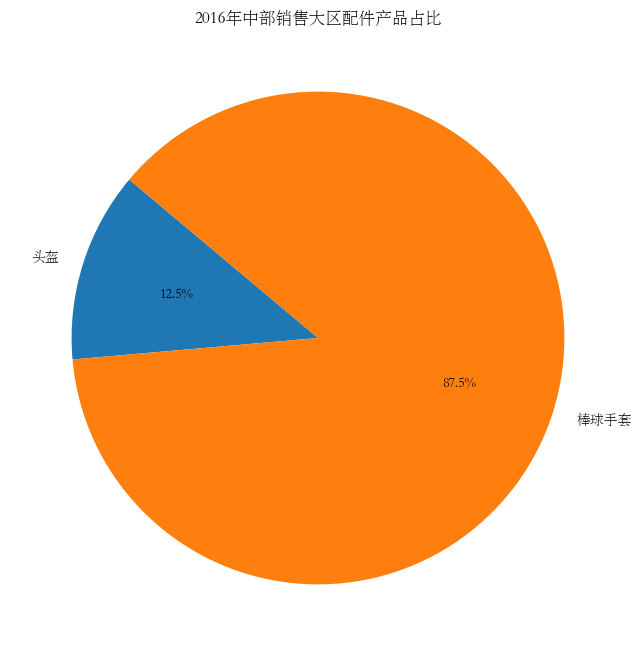

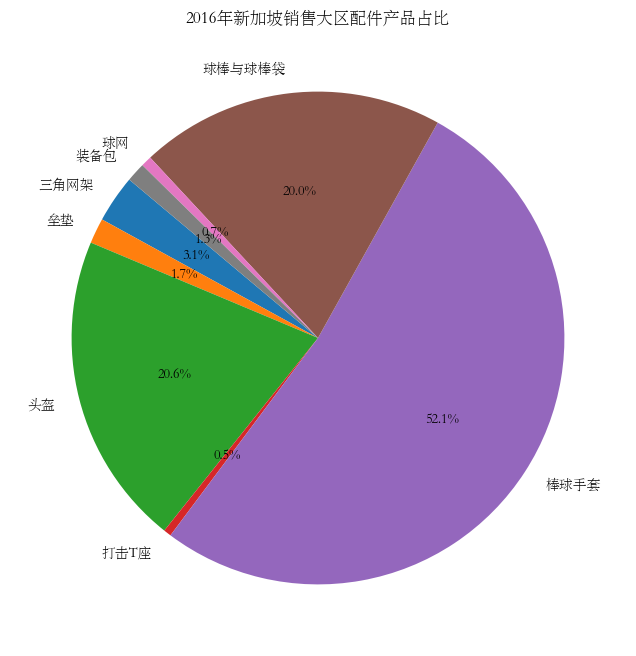

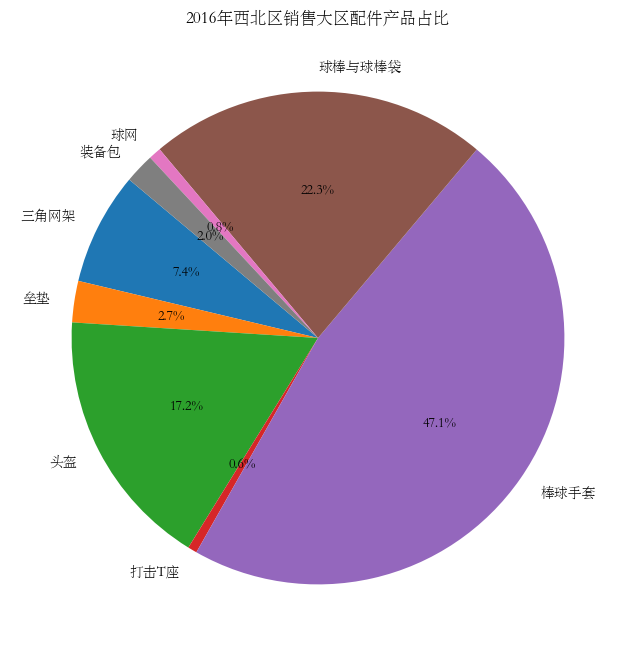

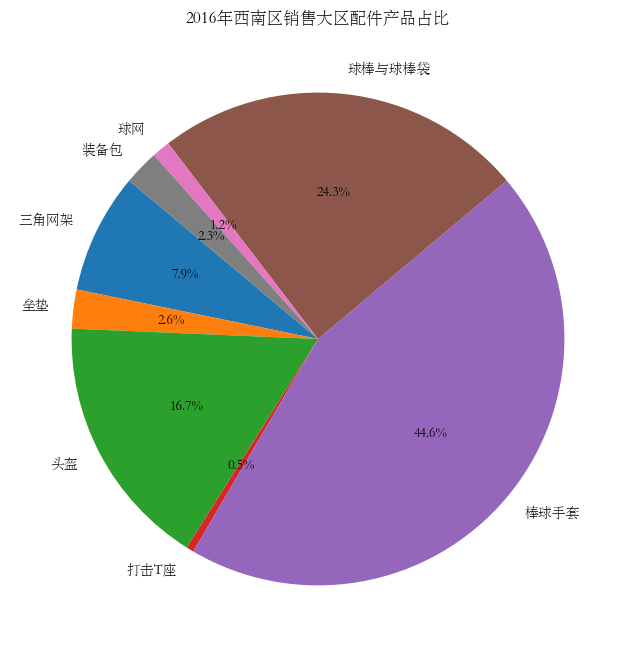

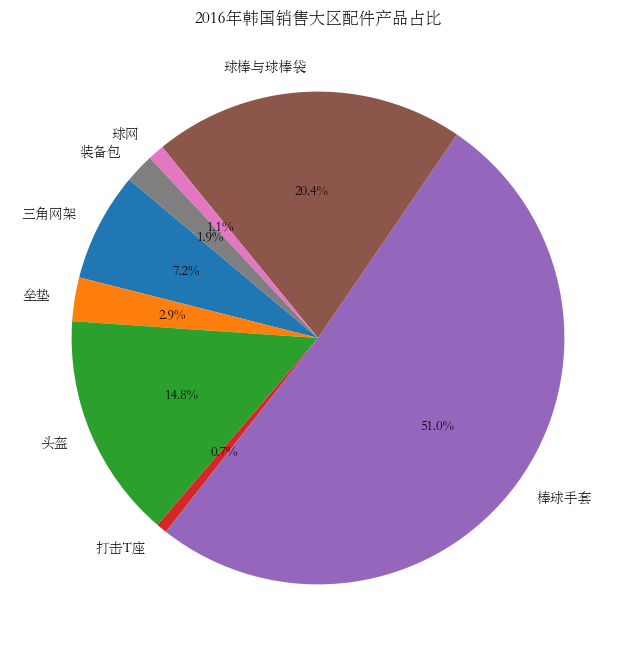

In [9]:
grouped_year_rate = accessories_df.groupby([accessories_df['年份'], accessories_df['销售大区'], accessories_df['产品名称']]).size().reset_index(name='订单数量')

# 计算每个产品在每个销售大区每年的销售占比
grouped_year_rate['占比'] = grouped_year_rate.groupby(['年份', '销售大区'])['订单数量'].transform(lambda x: x / x.sum())

# 打印统计结果
print(grouped_year_rate)

# 可视化
for year in [2015, 2016]:
    for region in grouped_year_rate['销售大区'].unique():
        plt.figure(figsize=(8, 8))
        year_region_data = grouped_year_rate[(grouped_year_rate['年份'] == year) & (grouped_year_rate['销售大区'] == region)]
        plt.pie(year_region_data['占比'], labels=year_region_data['产品名称'], autopct='%1.1f%%', startangle=140)
        plt.title(f'{year}年{region}销售大区配件产品占比')
        plt.show()

      年份    产品名称   订单数量        占比
0   2015    三角网架    883  0.058769
1   2015      垒垫    383  0.025491
2   2015      头盔   2646  0.176106
3   2015    打击T座    119  0.007920
4   2015    棒球手套   7279  0.484459
5   2015  球棒与球棒袋   3273  0.217837
6   2015      球网    137  0.009118
7   2015     装备包    305  0.020300
8   2016    三角网架   1238  0.058765
9   2016      垒垫    525  0.024920
10  2016      头盔   3794  0.180092
11  2016    打击T座    130  0.006171
12  2016    棒球手套  10053  0.477192
13  2016  球棒与球棒袋   4708  0.223477
14  2016      球网    191  0.009066
15  2016     装备包    428  0.020316


<Figure size 1200x600 with 0 Axes>

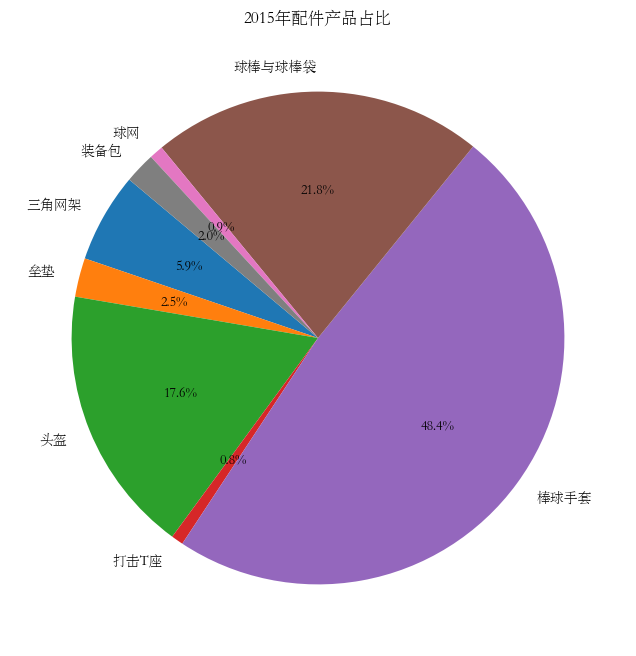

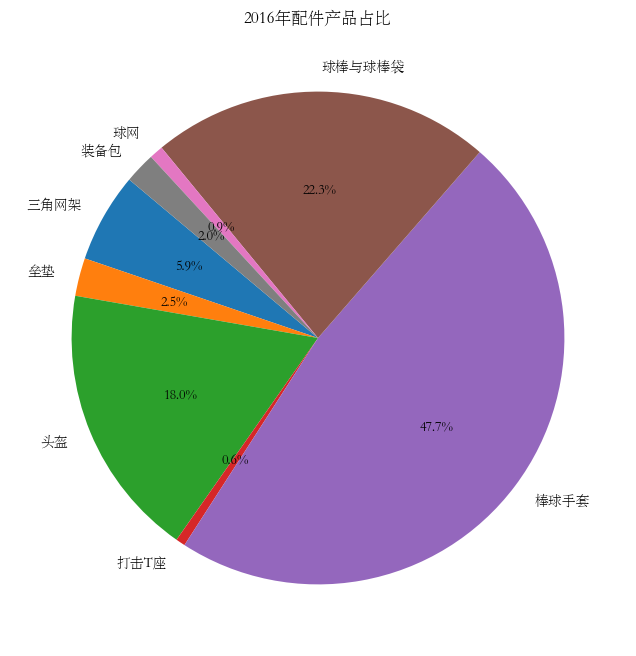

In [8]:
grouped_name = accessories_df.groupby([accessories_df['年份'], accessories_df['产品名称']]).size().reset_index(name='订单数量')

# 计算每个产品在每年的占比
grouped_name['占比'] = grouped_name.groupby('年份')['订单数量'].transform(lambda x: x / x.sum())

# 打印统计结果
print(grouped_name)

# 可视化
plt.figure(figsize=(12, 6))

# 对于2015年和2016年分别绘制饼图
for year in [2015, 2016]:
    year_data = grouped_name[grouped_name['年份'] == year]
    plt.figure(figsize=(8, 8))
    plt.pie(year_data['占比'], labels=year_data['产品名称'], autopct='%1.1f%%', startangle=140)
    plt.title(f'{year}年配件产品占比')
    plt.show()

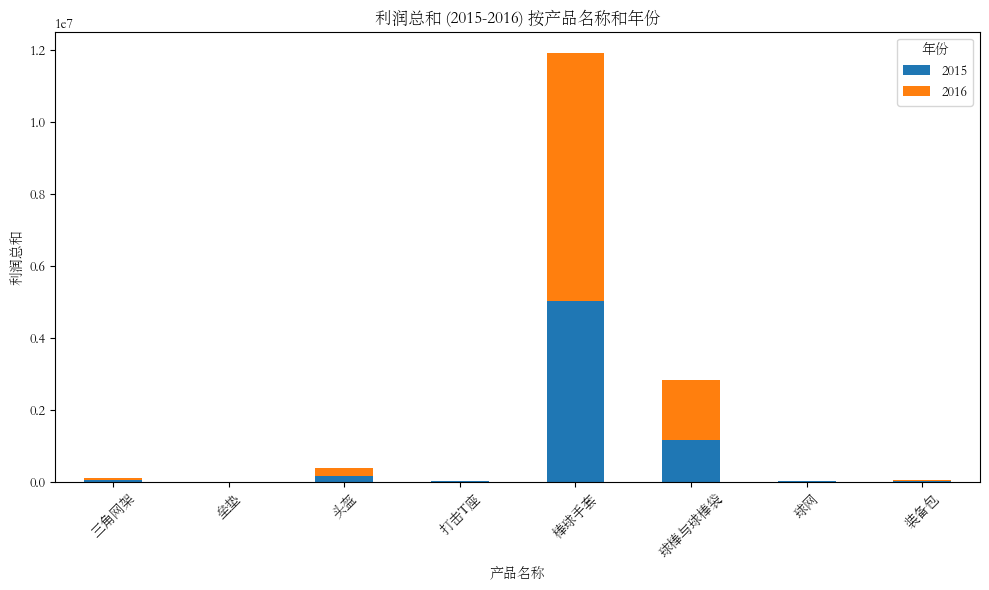

In [10]:
# 根据年份和产品名称分组，然后计算利润总和
profit_sum = accessories_df.groupby(['年份', '产品名称'])['利润'].sum().reset_index()

# 将数据透视，以便更容易地进行可视化
pivot_data = profit_sum.pivot(index='产品名称', columns='年份', values='利润')
pivot_data.fillna(0, inplace=True)

# 绘制条形图
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('利润总和 (2015-2016) 按产品名称和年份')
plt.xlabel('产品名称')
plt.ylabel('利润总和')
plt.xticks(rotation=45)
plt.legend(title='年份')

# 显示图表
plt.tight_layout()
plt.show()

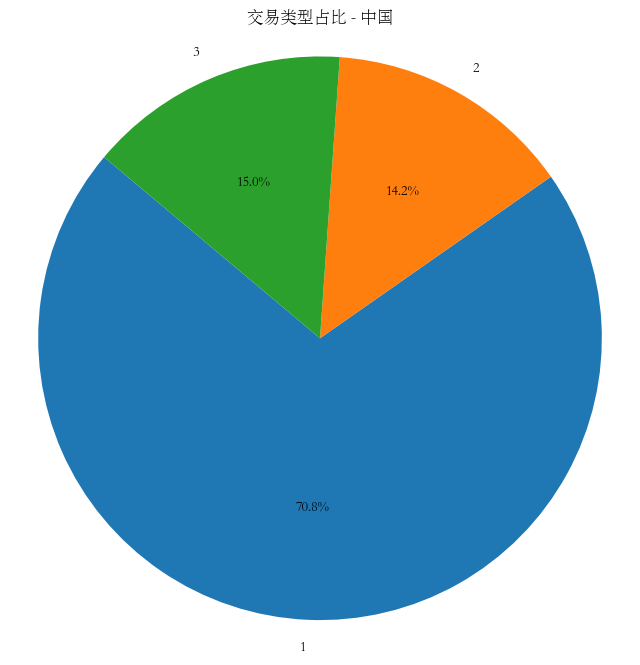

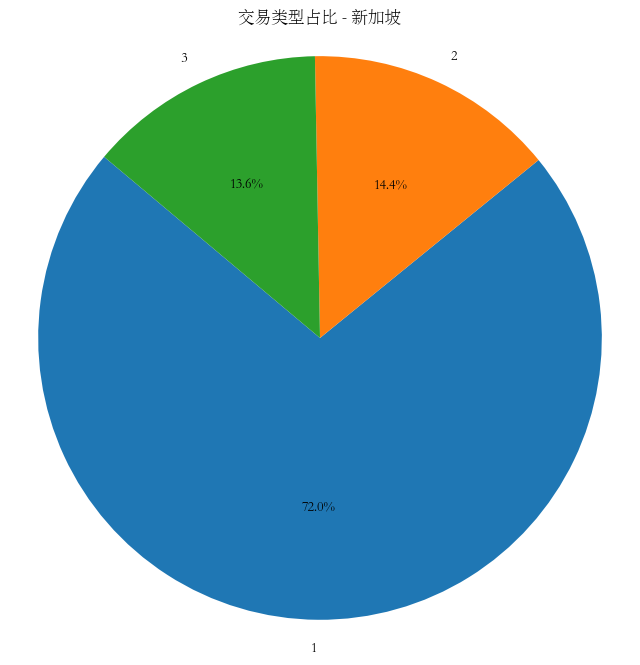

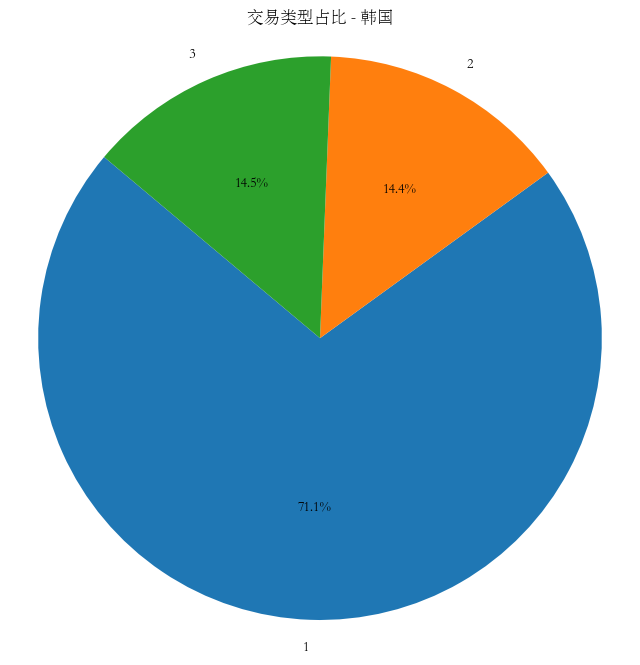

In [7]:
area_transaction_type = data.groupby(['区域', '交易类型']).size().unstack(fill_value=0)

# 计算占比
area_transaction_type_percentage = area_transaction_type.div(area_transaction_type.sum(axis=1), axis=0) * 100

# 遍历每个区域并绘制饼状图
for area in area_transaction_type_percentage.index:
    plt.figure(figsize=(8, 8))
    plt.pie(area_transaction_type_percentage.loc[area], labels=area_transaction_type_percentage.loc[area].index, autopct='%1.1f%%', startangle=140)
    plt.title(f'交易类型占比 - {area}')
    plt.axis('equal')  # 使饼图为正圆形
    plt.show()

区域
中国     42887
新加坡     5117
韩国      7287
Name: 订单数量, dtype: int64
区域
中国     77.565969
韩国     13.179360
新加坡     9.254671
Name: 订单数量, dtype: float64


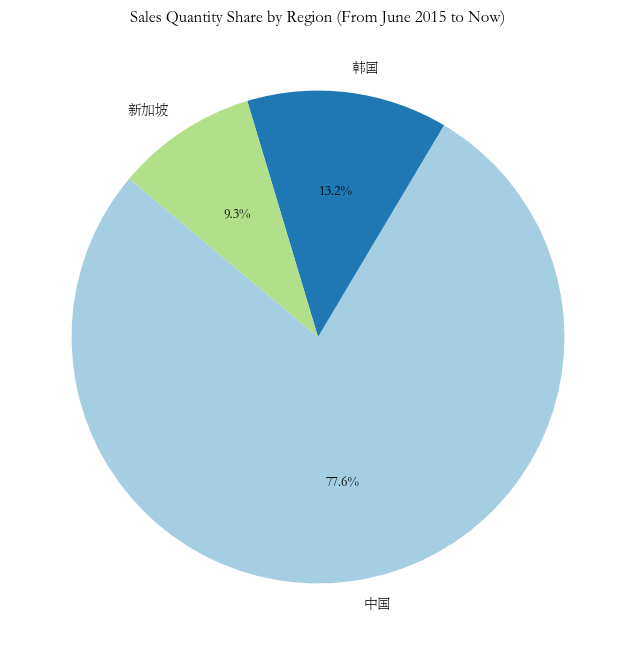

In [3]:
df = pd.DataFrame(data)

# 转换日期列为 datetime 类型
df['订单日期_time'] = pd.to_datetime(df['订单日期_time'])

# 过滤数据：选择2015年6月1日至今的数据
df_filtered = df[df['订单日期_time'] >= '2015-06-01']

# 按地区 (销售大区) 统计销售量
sales_by_region = df_filtered.groupby('区域')['订单数量'].sum()
print(sales_by_region)

# 计算每个地区的销售量占比
total_sales = sales_by_region.sum()
sales_by_region_percentage = (sales_by_region / total_sales) * 100

# 排序：按销售量占比从高到低排序
sales_by_region_percentage = sales_by_region_percentage.sort_values(ascending=False)

# 打印每个地区的销售占比
print(sales_by_region_percentage)

# 可视化：绘制饼状图
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region_percentage, labels=sales_by_region_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# 添加标题
plt.title('Sales Quantity Share by Region (From June 2015 to Now)')

# 显示图形
plt.show()

In [5]:
# 转换日期列为 datetime 类型

data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出2015年6月1日及之后的数据
df_filtered = data[data['订单日期_time'] >= '2015-06-01']

# 过滤出销售大区为西南区的数据
southwest_region_data = df_filtered[df_filtered['销售大区'] == '西南区']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 对数据进行 one-hot 编码
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 生成频繁项集
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# 生成关联规则，使用置信度来筛选
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.35)

# 排序关联规则
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# 打印排序后的关联规则
print("销售大区为西南区的关联规则：")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

销售大区为西南区的关联规则：
   antecedents consequents   support  confidence       lift
25  (225, 478)       (477)  0.012596    0.981818   4.501663
26  (477, 485)       (478)  0.019128    0.964706   8.799349
19  (537, 214)       (528)  0.010264    0.916667   5.813240
4        (479)       (477)  0.065080    0.897106   4.113255
27  (485, 478)       (477)  0.019128    0.872340   3.999704
23  (537, 222)       (528)  0.010264    0.862745   5.471284
3        (478)       (477)  0.094238    0.859574   3.941172
17       (541)       (530)  0.032190    0.836364  17.490200
21  (217, 537)       (528)  0.011896    0.836066   5.302090
29  (478, 487)       (477)  0.010030    0.796296   3.651040
12       (537)       (528)  0.060182    0.689840   4.374767
15       (540)       (529)  0.030091    0.675393   7.579603
16       (530)       (541)  0.032190    0.673171  17.490200
30  (480, 537)       (528)  0.020994    0.661765   4.196724
10       (536)       (528)  0.032890    0.618421   3.921851
14       (539)       (529

In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# 确保'订单日期_time'列是日期时间格式
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出销售大区为西南区的数据
southwest_region_data = data[data['销售大区'] == '西南区']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 对数据进行 one-hot 编码
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# 生成频繁项集
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# 生成关联规则，使用置信度来筛选
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 排序关联规则
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# 打印排序后的关联规则
print("销售大区为西南区的关联规则：")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

销售大区为西南区的关联规则：
   antecedents consequents   support  confidence       lift
11  (225, 478)       (477)  0.012135    0.981818   4.672825
12  (477, 485)       (478)  0.018427    0.964706   9.133917
1        (479)       (477)  0.062697    0.897106   4.269649
13  (485, 478)       (477)  0.018427    0.872340   4.151781
0        (478)       (477)  0.090787    0.859574   4.091023
9        (541)       (530)  0.031011    0.836364  18.155211
10  (217, 537)       (528)  0.011461    0.836066   5.503686
4        (537)       (528)  0.057978    0.689840   4.541104
7        (540)       (529)  0.028989    0.675393   7.867794
8        (530)       (541)  0.031011    0.673171  18.155211
14  (480, 537)       (528)  0.020225    0.661765   4.356291
3        (536)       (528)  0.031685    0.618421   4.070967
6        (539)       (529)  0.018427    0.616541   7.182223
2        (487)       (477)  0.021348    0.565476   2.691304
5        (538)       (529)  0.021348    0.524862   6.114229


In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# 确保'订单日期_time'列是日期时间格式
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出销售大区为西南区的数据
southwest_region_data = data[data['销售大区'] == '东北区']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 对数据进行 one-hot 编码
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df1 = pd.DataFrame(te_ary, columns=te.columns_)

# 生成频繁项集
frequent_itemsets = apriori(df1, min_support=0.01, use_colnames=True)

# 生成关联规则，使用置信度来筛选
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 排序关联规则
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# 打印排序后的关联规则
print("销售大区为东北区的关联规则：")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

销售大区为东北区的关联规则：
    antecedents consequents  support  confidence      lift
0         (580)       (214)    0.125         1.0  8.000000
1         (214)       (580)    0.125         1.0  8.000000
14        (473)       (222)    0.125         1.0  8.000000
15        (222)       (473)    0.125         1.0  8.000000
56   (217, 473)       (222)    0.125         1.0  8.000000
..          ...         ...      ...         ...       ...
221       (480)  (528, 537)    0.125         0.5  1.333333
43        (477)       (528)    0.125         0.5  1.000000
48        (478)       (528)    0.125         0.5  1.000000
49        (480)       (528)    0.125         0.5  1.000000
206  (477, 478)       (528)    0.125         0.5  1.000000

[500 rows x 5 columns]


In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# 确保'订单日期_time'列是日期时间格式
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出销售大区为西南区的数据
southwest_region_data = data[data['销售大区'] == '东南区']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 对数据进行 one-hot 编码
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

# 生成频繁项集
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)

# 生成关联规则，使用置信度来筛选
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 排序关联规则
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# 打印排序后的关联规则
print("销售大区为东北区的关联规则：")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

销售大区为东北区的关联规则：
          antecedents consequents   support  confidence  lift
11              (356)       (222)  0.083333         1.0  12.0
12              (222)       (356)  0.083333         1.0  12.0
13              (574)       (222)  0.083333         1.0  12.0
14              (222)       (574)  0.083333         1.0  12.0
15              (225)       (359)  0.083333         1.0  12.0
...               ...         ...       ...         ...   ...
70              (528)       (477)  0.083333         0.5   1.0
428        (528, 485)       (477)  0.083333         0.5   1.0
433        (537, 485)       (477)  0.083333         0.5   1.0
443        (528, 537)       (477)  0.083333         0.5   1.0
1444  (528, 537, 485)       (477)  0.083333         0.5   1.0

[6084 rows x 5 columns]


In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# 确保'订单日期_time'列是日期时间格式
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出销售大区为西南区的数据
southwest_region_data = data[data['销售大区'] == '中国台湾']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 对数据进行 one-hot 编码
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df3 = pd.DataFrame(te_ary, columns=te.columns_)

# 生成频繁项集
frequent_itemsets = apriori(df3, min_support=0.01, use_colnames=True)

# 生成关联规则，使用置信度来筛选
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 排序关联规则
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# 打印排序后的关联规则
print("销售大区为东北区的关联规则：")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

销售大区为东北区的关联规则：
        antecedents consequents   support  confidence      lift
40       (477, 606)       (479)  0.010978    1.000000  8.427313
56       (529, 541)       (530)  0.011500    1.000000  6.355482
60       (540, 541)       (530)  0.012546    1.000000  6.355482
71  (529, 540, 541)       (530)  0.010978    1.000000  6.355482
15       (214, 479)       (477)  0.020387    1.000000  4.061571
..              ...         ...       ...         ...       ...
50       (528, 537)       (530)  0.010978    0.512195  3.255247
22       (477, 222)       (478)  0.016205    0.508197  4.629430
48       (480, 530)       (541)  0.027182    0.500000  5.403955
10            (537)       (530)  0.019341    0.500000  3.177741
11            (540)       (530)  0.016205    0.500000  3.177741

[77 rows x 5 columns]


In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# 确保'订单日期_time'列是日期时间格式
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出销售大区为西南区的数据
southwest_region_data = data[data['销售大区'] == '中国澳门']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 对数据进行 one-hot 编码
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df4 = pd.DataFrame(te_ary, columns=te.columns_)

# 生成频繁项集
frequent_itemsets = apriori(df4, min_support=0.01, use_colnames=True)

# 生成关联规则，使用置信度来筛选
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 排序关联规则
rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# 打印排序后的关联规则
print("销售大区为东北区的关联规则：")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

销售大区为东北区的关联规则：
   antecedents consequents   support  confidence       lift
41  (536, 529)       (540)  0.010304    1.000000  21.502994
39  (528, 540)       (536)  0.010860    1.000000  18.136364
30  (584, 477)       (479)  0.011417    1.000000   7.055010
15  (217, 479)       (477)  0.011139    1.000000   4.657588
23  (225, 479)       (477)  0.020050    1.000000   4.657588
27  (480, 479)       (477)  0.011139    1.000000   4.657588
12  (214, 479)       (477)  0.013088    0.959184   4.467482
28  (487, 479)       (477)  0.013088    0.959184   4.467482
18  (222, 479)       (477)  0.011974    0.955556   4.450584
21  (225, 478)       (477)  0.015038    0.947368   4.412451
25  (485, 478)       (477)  0.013367    0.888889   4.140078
38  (480, 541)       (530)  0.010304    0.880952  16.223077
10       (541)       (530)  0.026177    0.878505  16.178001
2        (479)       (477)  0.123364    0.870334   4.053657
20  (539, 222)       (529)  0.011139    0.869565   6.295582
0        (478)       (477

In [19]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# 确保'订单日期_time'列是日期时间格式
data['订单日期_time'] = pd.to_datetime(data['订单日期_time'])

# 过滤出销售大区为西南区的数据
southwest_region_data = data[data['销售大区'] == '韩国']

# 按客户ID分组，并将每个客户购买的产品ID列出
customer_purchases = southwest_region_data.groupby('客户ID')['产品ID'].apply(list)

# 检查是否有客户没有购买任何产品
if customer_purchases.apply(lambda x: len(x)).eq(0).any():
    print("警告：存在没有购买任何产品的客户。")

# 转换为适合 TransactionEncoder 输入的数据格式
transactions = customer_purchases.apply(lambda x: [item for item in x])

# 检查交易数据是否为空
if transactions.empty:
    print("错误：交易数据为空。")
else:
    # 对数据进行 one-hot 编码
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    # 生成频繁项集
    frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)  # 降低min_support值

    # 检查是否生成了频繁项集
    if frequent_itemsets.empty:
        print("警告：没有找到频繁项集。请检查min_support值是否设置得太低。")
    else:
        # 生成关联规则，使用置信度来筛选
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

        # 排序关联规则
        rules_sorted = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

        # 打印排序后的关联规则
        print("销售大区为西南区的关联规则：")
        print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

D:\anaconda\envs\DM\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
D:\anaconda\envs\DM\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
D:\anaconda\envs\DM\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
D:\anaconda\envs\DM\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
D:\anaconda\envs\DM\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


MemoryError: Unable to allocate 32.9 GiB for an array with shape (3209583, 7, 1571) and data type bool

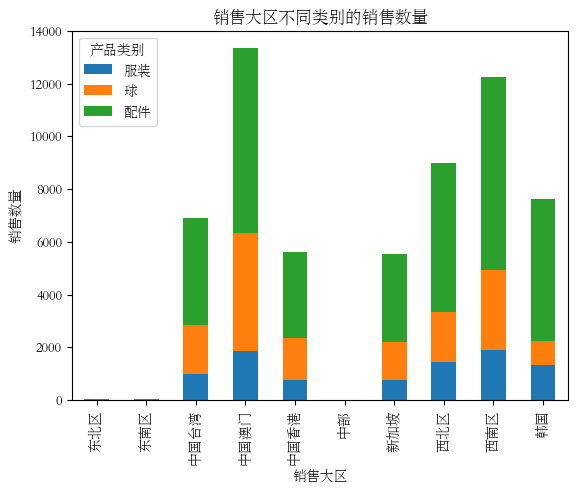

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
# 设置 matplotlib 使用该字体
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False
data=pd.read_csv(r"C:\Users\chenz\Desktop\体育用品企业销售数据集\订单表.csv")
df = pd.DataFrame(data)


# 计算每个销售大区不同产品类别的销售数量
category_sales = df.groupby(['销售大区', '产品类别'])['订单数量'].sum().unstack(fill_value=0)

# 绘制条形图
category_sales.plot(kind='bar', stacked=True)

# 设置图表标题和标签
plt.title('销售大区不同类别的销售数量')
plt.xlabel('销售大区')
plt.ylabel('销售数量')

# 显示图例
plt.legend(title='产品类别')

# 显示图表
plt.show()

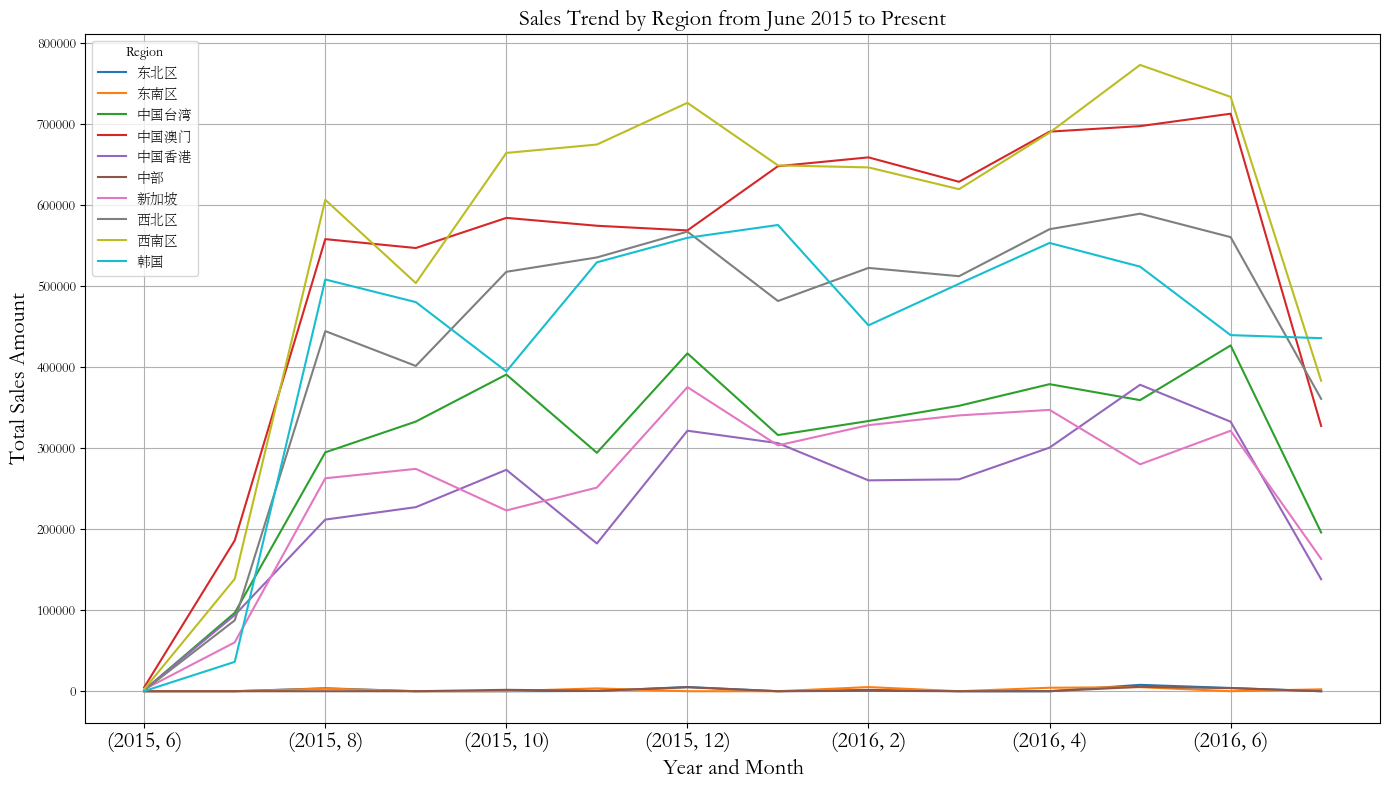

In [27]:
# 筛选2015年6月到至今的数据
df['订单日期_time'] = pd.to_datetime(df['订单日期_time'], errors='coerce')
df = df[(df['订单日期_time'] >= '2015-06-01')]

# 提取年份和月份
df['Year'] = df['订单日期_time'].dt.year
df['Month'] = df['订单日期_time'].dt.month

# 按区域、年份和月份分组，计算每个组的销售总额
sales_trend = df.groupby(['销售大区', 'Year', 'Month'])['销售金额'].sum().reset_index()

pivot_table = sales_trend.pivot_table(index=['Year', 'Month'], columns='销售大区', values='销售金额', fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))  # 设置画布大小
pivot_table.plot(ax=ax, title='Sales Trend by Region from June 2015 to Present')

# 设置标题、轴标签和图例的字体为加粗
ax.set_title('Sales Trend by Region from June 2015 to Present', fontsize=16, fontweight='bold')
ax.set_xlabel('Year and Month', fontsize=16, fontweight='bold')
ax.set_ylabel('Total Sales Amount', fontsize=16, fontweight='bold')
ax.legend(title='Region', fontsize=10, frameon=True)

# 增大x轴标签的字体大小
ax.tick_params(axis='x', labelsize=16)  # 您可以根据需要调整labelsize的值

# 显示网格
ax.grid(True)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

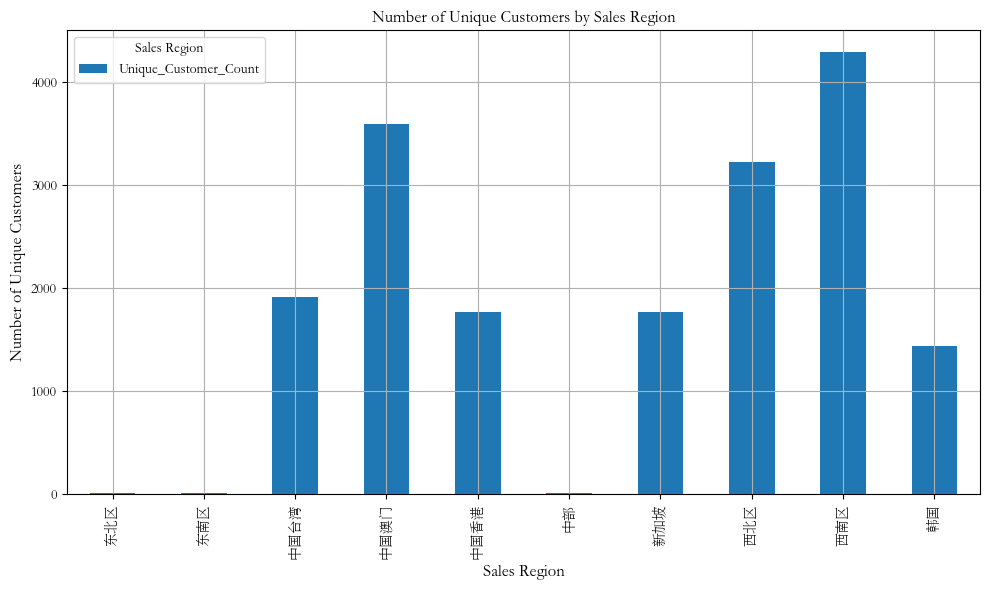

In [25]:

# 按照销售大区分组并计算每个分组中唯一的客户ID数量
customer_counts = df.groupby('销售大区')['客户ID'].nunique().reset_index(name='Unique_Customer_Count')

# 绘制柱状图
ax = customer_counts.plot(kind='bar', figsize=(10, 6), x='销售大区', y='Unique_Customer_Count', title='Number of Unique Customers by Sales Region')

# 设置x轴和y轴的标签
plt.xlabel('Sales Region', fontsize=12)
plt.ylabel('Number of Unique Customers', fontsize=12)

# 显示图例
plt.legend(title='Sales Region')

# 显示网格
plt.grid(True)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

<Figure size 1600x800 with 0 Axes>

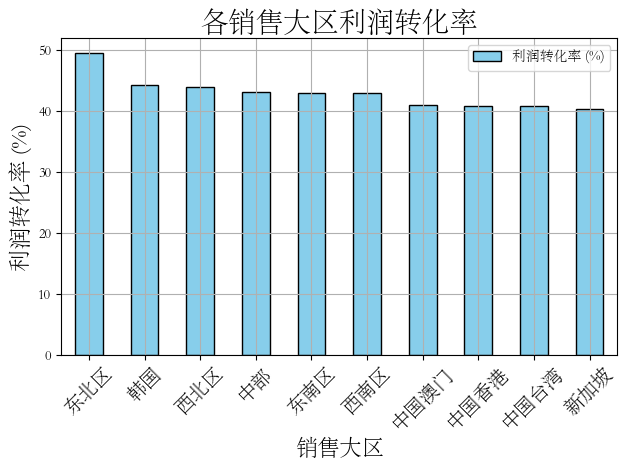

In [32]:
import seaborn as sns
df['利润'] = pd.to_numeric(df['利润'], errors='coerce')  # 确保利润列是数值型
df['销售金额'] = pd.to_numeric(df['销售金额'], errors='coerce')  # 确保销售金额列是数值型

region_profit = df.groupby('销售大区')['利润'].sum()
region_sales = df.groupby('销售大区')['销售金额'].sum()

# 计算利润转化率
profit_conversion_rate = (region_profit / region_sales) * 100

# 将结果转换为DataFrame
profit_conversion_df = pd.DataFrame(profit_conversion_rate, columns=['利润转化率 (%)'])

# 按照利润转化率排序
profit_conversion_df = profit_conversion_df.sort_values(by='利润转化率 (%)', ascending=False)

# 绘制条形图
plt.figure(figsize=(12, 8))  # 设置画布大小
bar = profit_conversion_df.plot(kind='bar', color='skyblue', edgecolor='black')

# 设置标题和轴标签
plt.title('各销售大区利润转化率', fontsize=20, fontweight='bold')
plt.xlabel('销售大区', fontsize=16, fontweight='bold')
plt.ylabel('利润转化率 (%)', fontsize=16, fontweight='bold')

# 增大x轴标签
plt.xticks(rotation=45, fontsize=14)  # 旋转标签并增大字体

# 显示网格
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

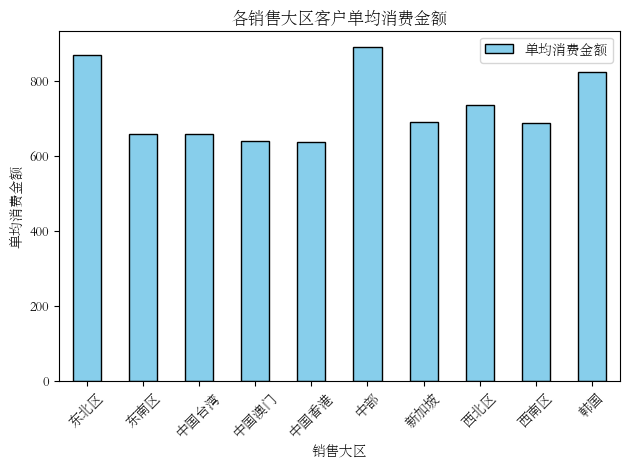

In [38]:
df['总消费金额'] = df.groupby('客户ID')['销售金额'].transform('sum')

# 2. 计算每个客户的购买次数
df['购买次数'] = df.groupby('客户ID')['订单数量'].transform('sum')

# 3. 计算每个客户的单均消费金额
df['单均消费金额'] = df['总消费金额'] / df['购买次数']

# 4. 按照销售大区分组，计算每个区域的平均单均消费金额
avg_spending_by_region = df.groupby('销售大区')['单均消费金额'].mean().reset_index()

# 5. 使用柱状图进行可视化
plt.figure(figsize=(12, 6))
avg_spending_by_region.plot(kind='bar', x='销售大区', y='单均消费金额', color='skyblue', edgecolor='black')
plt.title('各销售大区客户单均消费金额')
plt.xlabel('销售大区')
plt.ylabel('单均消费金额')
plt.xticks(rotation=45)  # 旋转x轴标签，以便阅读
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()